In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN 
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics 
from numpy import unique
from numpy import where

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/data/football_data.csv')
df_org = df.copy()

##Pre Processing

In [ ]:
def process_value(s):
  if s[1] == '0':
    return np.nan
  if s == ' ' or s == '' or s == np.nan:
    return np.nan
  s = s[1:len(s)-1]
  return float(s)

In [ ]:
def process_wage(s):
  if s[1] == '0':
    return np.nan
  if s == ' ' or s == '' or s == np.nan:
    return np.nan
  s = s[1:len(s)-1]
  return float(s)

In [ ]:
def process_contract_valid(s):
  if s == ' ' or s == '' or s == np.nan or type(s) is float:
    return np.nan
  if len(s) > 4:
    s = s[-4:len(s)]
  return float(s)

In [ ]:
def process_height(s):
  if s == np.nan or s == ' ' or s == '' or type(s) is float:
    return np.nan
  s = s.split('\'')
  if len(s) == 1:
    return 12*int(s[0])
  else:
    a = 12*int(s[0])
    b = s[1]
    c = float(a)+float(b)
    return c

In [ ]:
def process_weight(s):
  if s == ' ' or s == '' or s == np.nan or type(s) is float:
    return np.nan
  s = s[0:len(s)-3]
  return float(s)

In [ ]:
def process_release_clause(s):
  if s == ' ' or s == '' or s == np.nan or type(s) is float:
    return np.nan
  s = s[1:len(s)-1]
  return float(s)

In [ ]:
def convertfloat(s):
  if s == ' ' or s == '' or s == np.nan or type(s) is float:
    return np.nan
  s = s.split('+')
  return float(int(s[0])+int(s[1]))

In [ ]:
def distance(x,c):
    sqrsum = 0
    for i in range(len(x)):
        sqrsum = sqrsum + ((x[i] - c[i]) ** 2)
    return sqrsum

In [ ]:
def calwss(centroid,cluster):
  wss = 0
  for i in range(len(centroid)):
    for j in range(len(cluster[i])):
      wss += distance(cluster[i][j],centroid[i])
  return math.sqrt(wss)

In [ ]:
df.drop(df.columns[24], axis=1, inplace=True)
df['Value'] = df['Value'].apply(process_value)
df['Wage'] = df['Wage'].apply(process_wage)
df['Height'] = df['Height'].apply(process_height)
df['Weight'] = df['Weight'].apply(process_weight)
df['Release Clause'] = df['Release Clause'].apply(process_release_clause)
df['Contract Valid Until'] = df['Contract Valid Until'].apply(process_contract_valid)
df['LS'] = df['LS'].apply(convertfloat)
df['ST'] = df['ST'].apply(convertfloat)
df['RS'] = df['RS'].apply(convertfloat)
df['LW'] = df['LW'].apply(convertfloat)
df['LF'] = df['LF'].apply(convertfloat)
df['CF'] = df['CF'].apply(convertfloat)
df['RF'] = df['RF'].apply(convertfloat)
df['RW'] = df['RW'].apply(convertfloat)
df['LAM'] = df['LAM'].apply(convertfloat)
df['CAM'] = df['CAM'].apply(convertfloat)
df['RAM'] = df['RAM'].apply(convertfloat)
df['LM'] = df['LM'].apply(convertfloat)
df['LCM'] = df['LCM'].apply(convertfloat)
df['CM'] = df['CM'].apply(convertfloat)
df['RCM'] = df['RCM'].apply(convertfloat)
df['RM'] = df['RM'].apply(convertfloat)
df['LWB'] = df['LWB'].apply(convertfloat)
df['LDM'] = df['LDM'].apply(convertfloat)
df['CDM'] = df['CDM'].apply(convertfloat)
df['RDM'] = df['RDM'].apply(convertfloat)
df['RWB'] = df['RWB'].apply(convertfloat)
df['LB'] = df['LB'].apply(convertfloat)
df['LCB'] = df['LCB'].apply(convertfloat)
df['CB'] = df['CB'].apply(convertfloat)
df['RCB'] = df['RCB'].apply(convertfloat)
df['RB'] = df['RB'].apply(convertfloat)

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df1 = numeric_df.drop(numeric_df.columns[[0, 1]], axis=1)
cols = list(numeric_df1.columns)

for i in cols :
  numeric_df1[i] = numeric_df1[i].apply(lambda x: float(x))
  numeric_df1.fillna(value=numeric_df1[i].mean(),inplace= True)

In [ ]:
ss = MinMaxScaler()
data_scaled = ss.fit_transform(numeric_df1)

In [ ]:
X = np.array(data_scaled)

In [ ]:
wss = []
sil_score = []

##Dendrogram

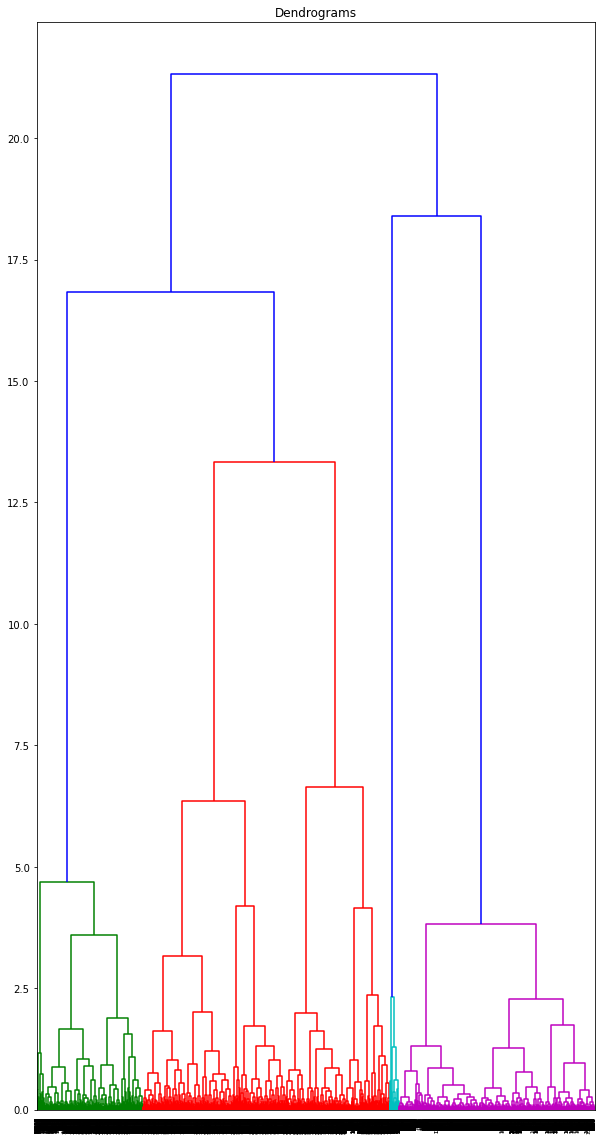

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 20))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

We can calculate the distance from each point to its closest neighbour using the NearestNeighbors. The point itself is included in n_neighbors. The kneighbors method returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points.

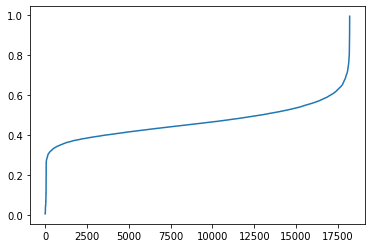

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

The optimal value for epsilon will be found at the point of maximum curvature.

###Now we will try to find the optimum value for epsilon

In [ ]:
for e in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] :
  db = DBSCAN(eps=e, min_samples=7).fit(X)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  sil_score_avg = silhouette_score(X, labels)
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)
  print("\nFor epsilon ", e, "no of clusters : ", n_clusters_, " and silhouette_score : ", sil_score_avg)


For epsilon  0.1 no of clusters :  1  and silhouette_score :  0.44875445487399224

For epsilon  0.2 no of clusters :  1  and silhouette_score :  0.4505828311791802

For epsilon  0.3 no of clusters :  1  and silhouette_score :  0.4510981354549129

For epsilon  0.4 no of clusters :  32  and silhouette_score :  -0.510154576938007

For epsilon  0.5 no of clusters :  4  and silhouette_score :  0.07741119182905844

For epsilon  0.6 no of clusters :  8  and silhouette_score :  -0.007235191558808858

For epsilon  0.7 no of clusters :  9  and silhouette_score :  -0.017317974425637598

For epsilon  0.8 no of clusters :  5  and silhouette_score :  0.1527943280512833

For epsilon  0.9 no of clusters :  5  and silhouette_score :  0.15328439116847353


###Now we will try to find optimum value for min samples

In [ ]:
for m in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] :
  db = DBSCAN(eps=0.9, min_samples=m).fit(X)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)
  print("\nFor min sample value ", m, "  no of clusters : ", n_clusters_)


For min sample value  1   no of clusters :  12

For min sample value  2   no of clusters :  8

For min sample value  3   no of clusters :  7

For min sample value  4   no of clusters :  5

For min sample value  5   no of clusters :  5

For min sample value  6   no of clusters :  5

For min sample value  7   no of clusters :  5

For min sample value  8   no of clusters :  5

For min sample value  9   no of clusters :  5

For min sample value  10   no of clusters :  5


###As we have already found the epsilion values. The maximum silhouette score is achieved for 0.2. But the cluster formed is only 1 for that case. Same for epsilion alue 0.3. So multiple clusters formed with highest silhouette score is for epsilion value 0.9, in that case the number of cluster formed is 5. So while choosing the number of samples it can be observed that we can choose the minimum sample is 4 for 5 clusters.

##DBSCAN for epsilon = 0.9 and min samples = 4

In [ ]:
db = DBSCAN(eps=0.9, min_samples=4).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("\nNo of clusters : ", n_clusters_)
print("\nNo of noise points : ", n_noise_)
print(set(labels))


No of clusters :  5

No of noise points :  13
{0, 1, 2, 3, 4, -1}


###Using eps as 0.9 and min_samples as 4, we got 5 clusters and cluster value as -1 being the outliers.

###Similar Attributes

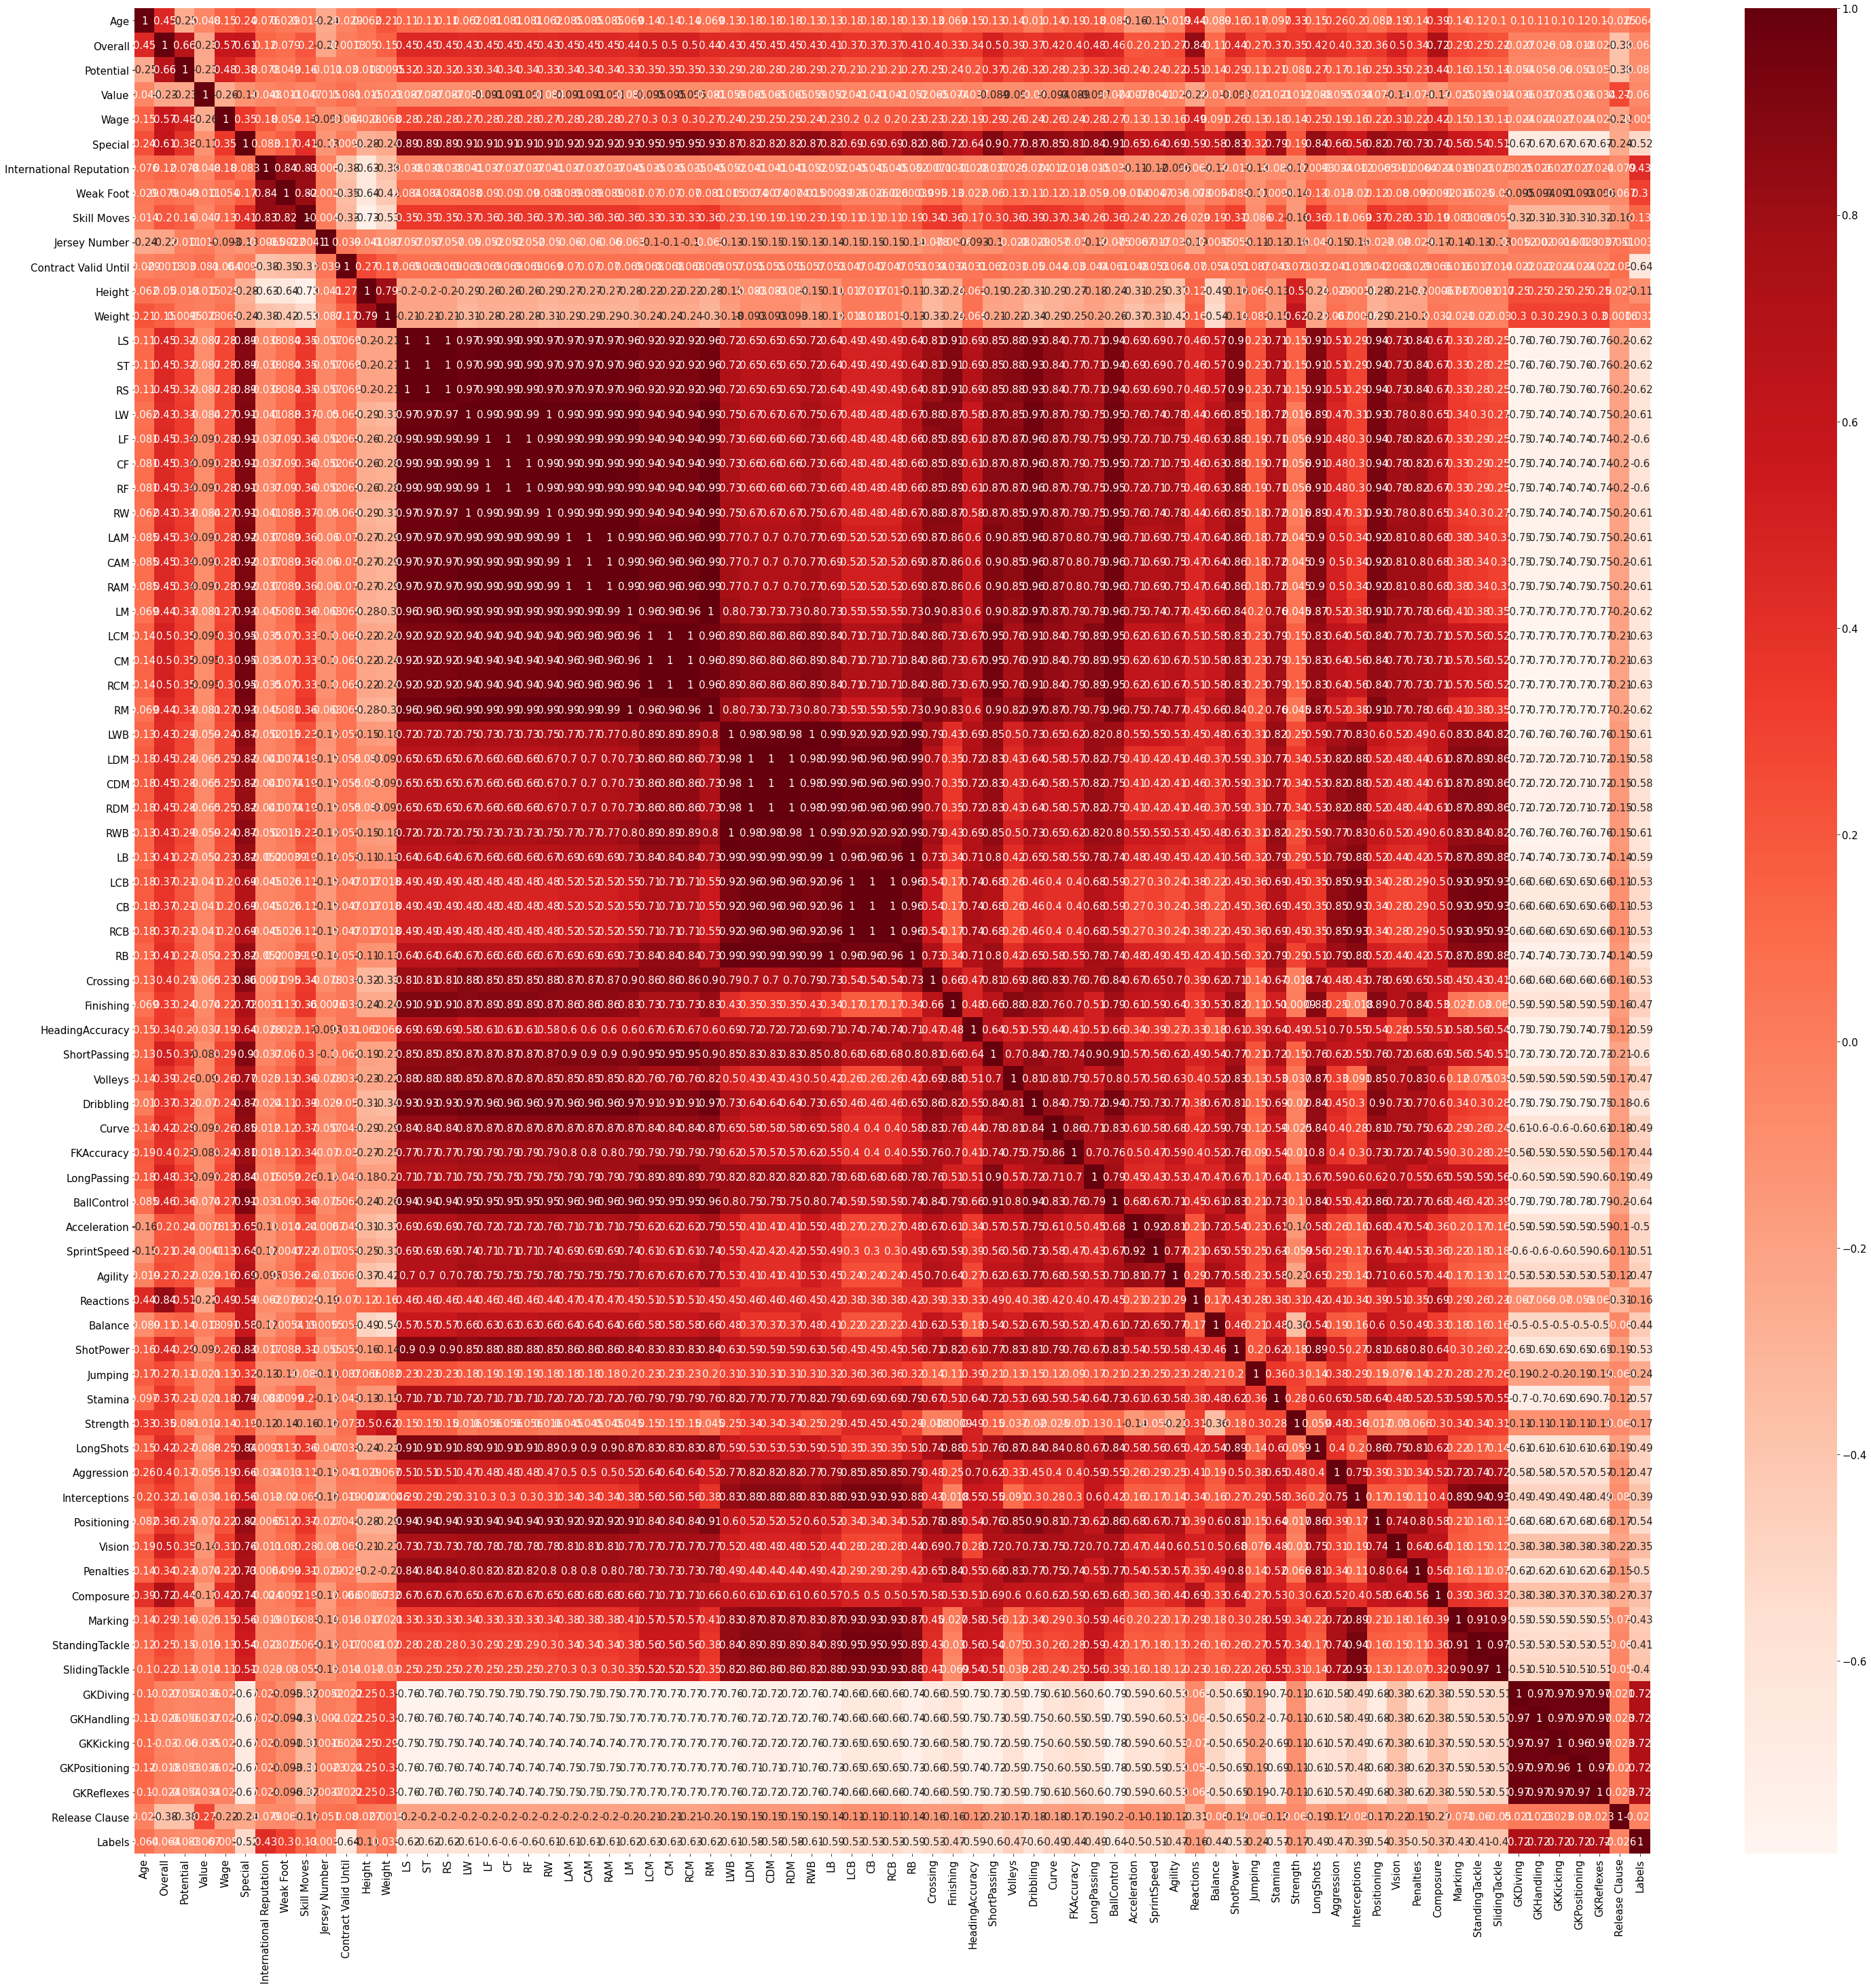

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(50,50),)
tdf = numeric_df1.copy()
tdf['Labels'] = labels
cor = tdf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
cor_target = abs(cor["Labels"])
relevant_features = cor_target[cor_target>0.7]
relevant_features

GKDiving         0.720140
GKHandling       0.720200
GKKicking        0.719524
GKPositioning    0.718432
GKReflexes       0.719903
Labels           1.000000
Name: Labels, dtype: float64

###Distortion and Silhouette Score

In [ ]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
clf.fit(X, labels)
centroids = clf.centroids_

In [ ]:
cluster = list()
wss = list()
sil_score = list()
np_c1 = []
np_c2 = []
np_c3 = []
np_c4 = []
np_c5 = []
np_c6 = []
  
for i in range(labels.shape[0]):
  if(labels[i] == 0):
    np_c1.append(X[i])
for i in range(labels.shape[0]):
  if(labels[i] == 1):
    np_c2.append(X[i])
for i in range(labels.shape[0]):
  if(labels[i] == 2):
    np_c3.append(X[i])
for i in range(labels.shape[0]):
  if(labels[i] == 3):
    np_c4.append(X[i])
for i in range(labels.shape[0]):
  if(labels[i] == 4):
    np_c5.append(X[i])
for i in range(labels.shape[0]):
  if(labels[i] == -1):
    np_c6.append(X[i])

np_c11 = np.array(np_c1)
np_c21 = np.array(np_c2)
np_c31 = np.array(np_c3)
np_c41 = np.array(np_c4)
np_c51 = np.array(np_c5)
np_c61 = np.array(np_c6)

cluster.append(np_c11)
cluster.append(np_c21)
cluster.append(np_c31)
cluster.append(np_c41)
cluster.append(np_c51)
cluster.append(np_c61)
  

wss.append(calwss(centroids, cluster))
sil_score.append(silhouette_score(X, labels))

In [ ]:
calwss(centroids, cluster)
print(wss[0])
print(silhouette_score(X, labels))

399.12872569184213
0.1534659600947577


##Number of Points in CLusters

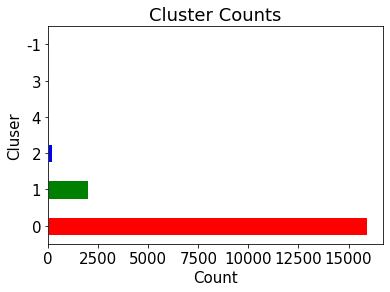

In [ ]:
target_counts = pd.Series(labels).value_counts()
target_counts.plot.barh(color=['r', 'g', 'b', 'k', 'y'], 
                        edgecolor='white');
plt.title('Cluster Counts')
plt.xlabel('Count')
plt.ylabel('Cluser');

In [ ]:
for i in range(len(target_counts)) :
  if i == 0 :
    print("\nNo of outliers ", target_counts[i-1])
  else :  
    print("\nCluster", i-1, " : " , target_counts[i-1])


No of outliers  241

Cluster 0  :  1975

Cluster 1  :  15739

Cluster 2  :  172

Cluster 3  :  32

Cluster 4  :  48


##Cluster Visualization

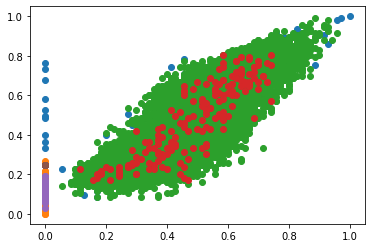

In [ ]:
clust = unique(labels)
for cls in clust:
	row_ix = where(labels == cls)
	plt.scatter(X[row_ix, 18], X[row_ix, 40])